Работа № 5 Щелыкалов Виктор
О свойствах различных оптимизаторов
1. Смастерить прогнозирующую модель (например из Keras, по-простому, без затей)
2. На имеющихся рядах испытать, задавая разные loss-функции и методы оптимизации
3. Сделать выводы о влиянии функции потерь и оптимизаторов на качество прогноза

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, Nadam, Adagrad, Adadelta
from keras.losses import MeanSquaredError, MeanAbsoluteError, Hinge, LogCosh, Poisson

TEST_SIZE = 0.33

### Временной ряд с явными периодами

<Axes: title={'center': 'Daily min temperature'}, xlabel='date'>

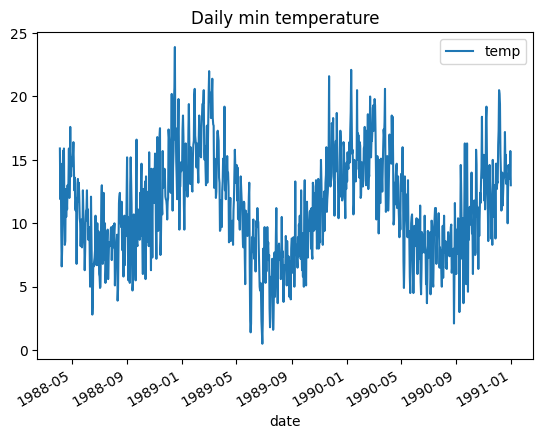

In [6]:
min_temp = pd.read_csv('data/daily-min-temperatures.csv')
min_temp = min_temp[-1000:]
min_temp.date = pd.to_datetime(min_temp.date)
min_temp = min_temp.set_index('date')
min_temp.plot(title="Daily min temperature")

In [40]:
df_len = len(min_temp['temp'].values)

test_temp = min_temp[int(-df_len*TEST_SIZE):]
train_temp = min_temp[0:int(-df_len*TEST_SIZE)]

### Хаотичный ряд

<Axes: title={'center': 'BTCUSDT 1m close price'}, xlabel='time'>

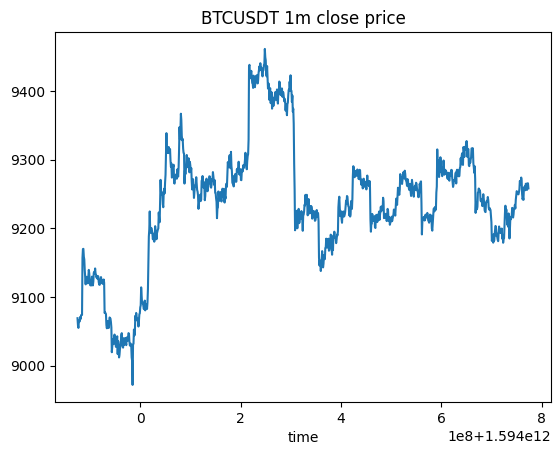

In [5]:
close_price = pd.read_csv('data/cryptoPrices15_wNB.csv')
close_price = close_price[['time','BTCUSDT']]
close_price = close_price[-1000:]
close_price= close_price.set_index('time')
close_price['BTCUSDT'].plot(title='BTCUSDT 1m close price')

In [38]:
df_len = len(close_price['BTCUSDT'].values)

test_close_price = close_price['BTCUSDT'][int(-df_len*TEST_SIZE):]
train_close_price = close_price['BTCUSDT'][0:int(-df_len*TEST_SIZE)]

In [34]:
model = Sequential()
model.add(Dense(512,activation='relu', input_dim=1))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

In [69]:
losses = [MeanSquaredError(), MeanAbsoluteError(), Hinge(), LogCosh(), Poisson()]
optimizers = [Adam(), SGD(), Adagrad(), Adadelta(), Nadam()]

In [71]:
df = pd.DataFrame(columns = ['loss', 'optimizer', 'loss result'])

def test_models(train, test):
  for loss in losses:
      for optimizer in optimizers:
          model.compile(loss=loss.name, optimizer=optimizer.name)
          model.fit(train, train, epochs=50)
          test_loss = model.evaluate(test, test)
          df.loc[len(df.index)] = [loss.name, optimizer.name, test_loss]


In [80]:
test_models(train_temp, test_temp)

Epoch 1/50
21/21 [==============================] - 1s 6ms/step - loss: 286992.1875
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 286498.3125
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 286311.3438
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 285617.2812
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 285602.2500
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 287603.1562
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 286731.9062
Epoch 8/50
21/21 [==============================] - 0s 5ms/step - loss: 286314.9375
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 286473.0625
Epoch 10/50
21/21 [==============================] - 0s 5ms/step - loss: 286984.0625
Epoch 11/50
21/21 [==============================] - 0s 9ms/step - loss: 286032.2500
Epoch 12/50
21/21 [==============================] - 0s 9ms/step - loss: 2

In [81]:
print(df.sort_values(by=['loss result']).to_string())

                   loss optimizer   loss result
20              poisson      Adam -1.645135e+01
21              poisson       SGD -1.644393e+01
23              poisson  Adadelta -1.643702e+01
22              poisson   Adagrad -1.643476e+01
24              poisson     Nadam -1.642856e+01
10                hinge      Adam  0.000000e+00
11                hinge       SGD  0.000000e+00
12                hinge   Adagrad  0.000000e+00
13                hinge  Adadelta  0.000000e+00
14                hinge     Nadam  0.000000e+00
60                hinge      Adam  5.585938e-01
61                hinge       SGD  5.585938e-01
62                hinge   Adagrad  5.585938e-01
63                hinge  Adadelta  5.585938e-01
38                hinge  Adadelta  5.585938e-01
39                hinge     Nadam  5.585938e-01
37                hinge   Adagrad  5.585938e-01
35                hinge      Adam  5.585938e-01
36                hinge       SGD  5.585938e-01
64                hinge     Nadam  5.585

In [82]:
test_models(train_close_price, test_close_price)

Epoch 1/50
21/21 [==============================] - 1s 5ms/step - loss: 80153736.0000
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 80157800.0000
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 80151968.0000
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 80133272.0000
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 80143440.0000
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 80149576.0000
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 80145296.0000
Epoch 8/50
21/21 [==============================] - 0s 5ms/step - loss: 80132624.0000
Epoch 9/50
21/21 [==============================] - 0s 6ms/step - loss: 80147920.0000
Epoch 10/50
21/21 [==============================] - 0s 5ms/step - loss: 80141600.0000
Epoch 11/50
21/21 [==============================] - 0s 5ms/step - loss: 80145952.0000
Epoch 12/50
21/21 [==============================] -

In [83]:
print(df.sort_values(by=['loss result']).to_string())

                   loss optimizer   loss result
20              poisson      Adam -1.645135e+01
21              poisson       SGD -1.644393e+01
23              poisson  Adadelta -1.643702e+01
22              poisson   Adagrad -1.643476e+01
24              poisson     Nadam -1.642856e+01
14                hinge     Nadam  0.000000e+00
13                hinge  Adadelta  0.000000e+00
12                hinge   Adagrad  0.000000e+00
11                hinge       SGD  0.000000e+00
10                hinge      Adam  0.000000e+00
60                hinge      Adam  5.585938e-01
85                hinge      Adam  5.585938e-01
86                hinge       SGD  5.585938e-01
87                hinge   Adagrad  5.585938e-01
88                hinge  Adadelta  5.585938e-01
62                hinge   Adagrad  5.585938e-01
63                hinge  Adadelta  5.585938e-01
89                hinge     Nadam  5.585938e-01
39                hinge     Nadam  5.585938e-01
35                hinge      Adam  5.585

Видим, что выбор функции потерь и оптимизации влияет на точность прогнозирования. Выбор данных функций зависит от предметной области и особенностей каждого из алгоритмов.

Например, для хаотичного временного ряда оптимизатор Adam и функция минимизации потерь poisson оказались наиболее эффективными. Это связано с тем, что Adam хорошо справляется с выбросами, а poisson loss эффективен при решении задач регрессии.